# Text TO Columns

In [1]:
# Import required packages 
import cv2 
import pytesseract 

import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [48]:
# Read image from which text needs to be extracted 
img = cv2.imread("dks.jpg") 
  
# Preprocessing the image starts 
  
# Convert the image to gray scale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

In [49]:
  
# Performing OTSU threshold 
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
  
# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 

In [50]:
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
  
# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE)


cntos = sort_contours(contours)  
# Creating a copy of image 
im2 = img.copy() 
  
# A text file is created and flushed 
file = open("dks.txt", "w+") 
file.write("") 
file.close() 

In [51]:
# Looping through the identified contours 
# Then rectangular part is cropped and passed on 
# to pytesseract for extracting text from it 
# Extracted text is then written into the text file 
i=0
for cnt in cntos: 
    x, y, w, h = cv2.boundingRect(cnt) 
    i=i+1
    print("at contour",i,"-->",x,y,w,h) 
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
      
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
    #img = cv2.drawContours(img, [cnt], 0, (0,255,0), i)
    #display(img.crop((x,y,w,h)))
      
    # Open the file in append mode 
    file = open("dks.txt", "a") 
      
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
    text = "at contour \n" + str(i) + text  
      
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
      
    # Close the file 
    file.close

at contour 1 --> 0 378 17 1020
at contour 2 --> 0 91 15 20
at contour 3 --> 56 0 2339 33
at contour 4 --> 72 409 763 1319
at contour 5 --> 86 276 749 29
at contour 6 --> 96 53 235 158
at contour 7 --> 343 307 233 53
at contour 8 --> 354 22 953 209
at contour 9 --> 644 382 18 19
at contour 10 --> 837 227 18 18
at contour 11 --> 858 275 732 549
at contour 12 --> 862 830 745 890
at contour 13 --> 1036 24 19 23
at contour 14 --> 1191 66 18 18
at contour 15 --> 1320 65 170 160
at contour 16 --> 1411 251 18 23
at contour 17 --> 1519 59 394 166
at contour 18 --> 1551 1018 18 18
at contour 19 --> 1621 279 762 1449
at contour 20 --> 1735 228 20 23
at contour 21 --> 1928 43 19 20
at contour 22 --> 1946 67 420 161
at contour 23 --> 2340 757 22 20
at contour 24 --> 2358 312 19 23
at contour 25 --> 2359 1170 21 22
at contour 26 --> 2376 1236 18 19
at contour 27 --> 2378 1321 17 18
at contour 28 --> 2385 742 10 19


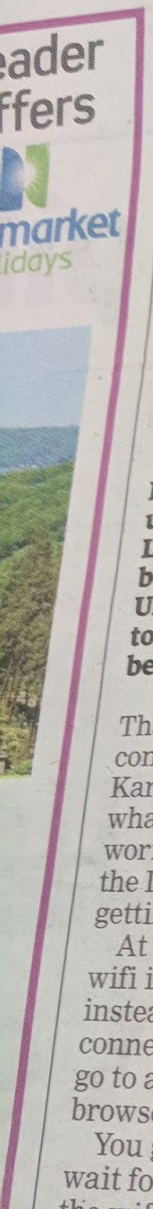

In [26]:
from PIL import Image#image class
img = Image.open(r'news4.jpg')
display(img.crop((0,66,153,1275)))

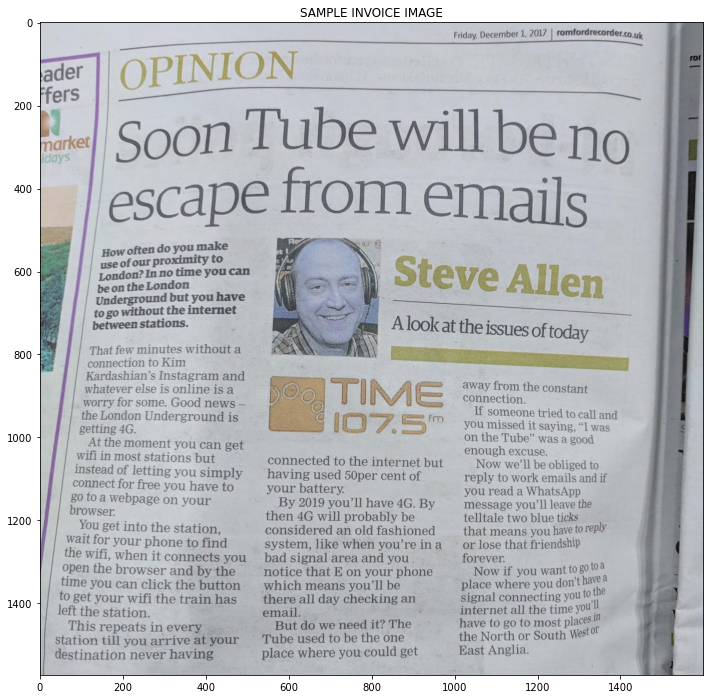

In [9]:

plt.figure(figsize=(16,12))
plt.imshow(img)
plt.title('SAMPLE INVOICE IMAGE')
plt.show()

In [6]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts)